In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import LeaveOneOut
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [13]:
df_in = pd.read_csv('finaldatabase_HNP_v2.csv')  # this one contains different sizes
df_in


,Size,Dose,P_density,CSKKKK,QHREDGS,RKDVY,WKYMVM,CLPFFD,QEINSSY,fold_change
0,HNP,1000,1.71,1,0,0,0,0,0,-0.713886
1,HNP,1000,1.71,0,1,0,0,0,0,-0.699131
2,HNP,1000,1.71,0,0,1,0,0,0,-0.749064
3,HNP,1000,1.71,0,0,0,1,0,0,-0.761759
4,HNP,1000,1.71,0,0,0,0,1,0,-0.690541
...,...,...,...,...,...,...,...,...,...,...
149,HMP,100,4.99,0,0,1,0,0,0,0.069006
150,HMP,100,4.99,1,1,0,0,0,0,1.174875
151,HMP,100,4.99,1,0,1,0,0,0,-0.151180
152,HMP,100,4.99,0,1,1,0,0,0,0.554630


In [14]:
!python --version

Python 3.9.7


In [16]:
### Make the peptides as category first
peptide_list = [[] for _ in range(len(df_in.index))]
df_new=df_in[['CSKKKK','QHREDGS','RKDVY','WKYMVM','CLPFFD','QEINSSY']]
col_names=['CSKKKK','QHREDGS','RKDVY','WKYMVM','CLPFFD','QEINSSY']
df_final = df_in.drop(col_names, axis=1)
df_final['Peptides'] = pd.Series([])
#print(df_final)
for i in range(len(df_new)):
    a=(df_new.loc[i,:]).to_numpy()
    indices=np.where(a== 1)[0]
    peptide_seqs = [col_names[j] for j in indices]
    print(peptide_seqs)
    peptide_list[i]=peptide_seqs
    #df_final.at[i, 'Peptides'] = peptide_seqs
print(df_final)

['CSKKKK']
['QHREDGS']
['RKDVY']
['WKYMVM']
['CLPFFD']
['QEINSSY']
['CSKKKK', 'QHREDGS']
['CSKKKK', 'RKDVY']
['CSKKKK', 'WKYMVM']
['CSKKKK', 'CLPFFD']
['CSKKKK', 'QEINSSY']
['QHREDGS', 'RKDVY']
['QHREDGS', 'WKYMVM']
['QHREDGS', 'CLPFFD']
['QHREDGS', 'QEINSSY']
['RKDVY', 'WKYMVM']
['RKDVY', 'CLPFFD']
['RKDVY', 'QEINSSY']
['WKYMVM', 'CLPFFD']
['WKYMVM', 'QEINSSY']
['CLPFFD', 'QEINSSY']
['CSKKKK']
['QHREDGS']
['RKDVY']
['WKYMVM']
['CLPFFD']
['QEINSSY']
['CSKKKK', 'QHREDGS']
['CSKKKK', 'RKDVY']
['CSKKKK', 'WKYMVM']
['CSKKKK', 'CLPFFD']
['CSKKKK', 'QEINSSY']
['QHREDGS', 'RKDVY']
['QHREDGS', 'WKYMVM']
['QHREDGS', 'CLPFFD']
['QHREDGS', 'QEINSSY']
['RKDVY', 'WKYMVM']
['RKDVY', 'CLPFFD']
['RKDVY', 'QEINSSY']
['WKYMVM', 'CLPFFD']
['WKYMVM', 'QEINSSY']
['CLPFFD', 'QEINSSY']
['CSKKKK']
['QHREDGS']
['RKDVY']
['WKYMVM']
['CLPFFD']
['QEINSSY']
['CSKKKK', 'QHREDGS']
['CSKKKK', 'RKDVY']
['CSKKKK', 'WKYMVM']
['CSKKKK', 'CLPFFD']
['CSKKKK', 'QEINSSY']
['QHREDGS', 'RKDVY']
['QHREDGS', 'WKYMVM']
['QHREDGS'

C:\Users\kejahanmir\Anaconda3\envs\my-rdkit-env\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  """


In [ ]:
df_in=df_final
df_in

(array([ 2.,  6.,  4., 11.,  8.,  5.,  1.,  1.,  0.,  2.,  6.,  1.,  0.,
         2.,  2.,  5.,  2.,  6.,  2.,  2.,  2.,  3.,  4.,  6.,  1.,  2.,
         1.,  4.,  3.,  1.,  5.,  2.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,
         1.,  1.,  0.,  0.,  1.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([-0.78266417, -0.76113787, -0.73961157, -0.71808528, -0.69655898,
        -0.67503268, -0.65350638, -0.63198008, -0.61045378, -0.58892749,
        -0.56740119, -0.54587489, -0.52434859, -0.50282229, -0.481296  ,
        -0.4597697 , -0.4382434 , -0.4167171 , -0.3951908 , -0.3736645 ,
        -0.35213821, -0.33061191, -0.30908561, -0.28755931, -0.26603301,
        -0.24450671, -0.22298042, -0.20145412, -0.17992782, -0.158401

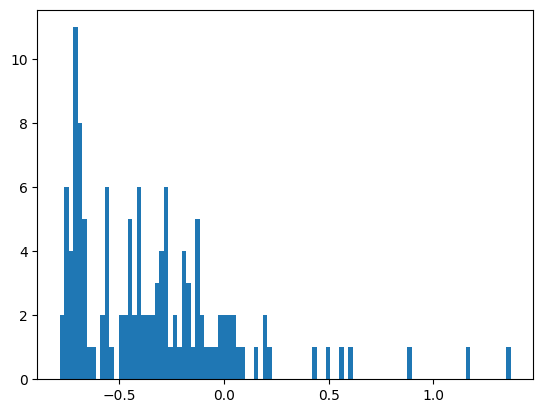

In [7]:
plt.hist(df_in.fold_change,  bins=100)

In [4]:
#df_in = df_in[['Size','Dose','P_density','CSKKKK','QHREDGS','RKDVY','WKYMVM','CLPFFD','QEINSSY','fold_change']]
df_in['Polarization_group'] = 0
df_in

,Size,Dose,P_density,CSKKKK,QHREDGS,RKDVY,WKYMVM,CLPFFD,QEINSSY,fold_change,Polarization_group,Size_type
0,HNP,1000,1.71,1,0,0,0,0,0,-0.713886,0,0
1,HNP,1000,1.71,0,1,0,0,0,0,-0.699131,0,0
2,HNP,1000,1.71,0,0,1,0,0,0,-0.749064,0,0
3,HNP,1000,1.71,0,0,0,1,0,0,-0.761759,0,0
4,HNP,1000,1.71,0,0,0,0,1,0,-0.690541,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
149,HMP,100,4.99,0,0,1,0,0,0,0.069006,0,0
150,HMP,100,4.99,1,1,0,0,0,0,1.174875,0,0
151,HMP,100,4.99,1,0,1,0,0,0,-0.151180,0,0
152,HMP,100,4.99,0,1,1,0,0,0,0.554630,0,0


In [5]:

for i in range(len(df_in)):
  if df_in.fold_change[i]<0:
    df_in.Polarization_group[i] = 1
  elif df_in.fold_change[i]>0:
    df_in.Polarization_group[i] = 0

C:\Users\Octavius Jessica\AppData\Local\Temp\ipykernel_21808\1031293842.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_in.Size_type[i] = 1
C:\Users\Octavius Jessica\AppData\Local\Temp\ipykernel_21808\1031293842.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_in.Size_type[i] = 0
C:\Users\Octavius Jessica\AppData\Local\Temp\ipykernel_21808\1031293842.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_in.Polarization_gr

In [6]:
#df = df_in[['Size','Dose','P_density','CSKKKK','QHREDGS','RKDVY','WKYMVM','CLPFFD','QEINSSY','Polarization_group']]
df=df_in.drop(['fold_change'], axis=1)
df_in.head(5)

,Size_type,Dose,P_density,CSKKKK,QHREDGS,RKDVY,WKYMVM,CLPFFD,QEINSSY,Polarization_group
0,1,1000,1.71,1,0,0,0,0,0,1
1,1,1000,1.71,0,1,0,0,0,0,1
2,1,1000,1.71,0,0,1,0,0,0,1
3,1,1000,1.71,0,0,0,1,0,0,1
4,1,1000,1.71,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
149,0,100,4.99,0,0,1,0,0,0,0
150,0,100,4.99,1,1,0,0,0,0,0
151,0,100,4.99,1,0,1,0,0,0,1
152,0,100,4.99,0,1,1,0,0,0,0


In [ ]:
#encoding and scaling 
#Simple way of encoding and scaling the object category and numeric columns without defining any piplines

import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
# perform one-hot encoding on the 'col' and 'size' columns
mlb = MultiLabelBinarizer()
encoded_col = pd.DataFrame(mlb.fit_transform(df['Peptides']), columns=mlb.classes_)
encoded_size = pd.get_dummies(df['Size'])
df = pd.concat([df.drop(['Peptides', 'Size'], axis=1), encoded_col, encoded_size], axis=1)

# perform scaling on the 'Dose' and 'P_density' columns
scaler = StandardScaler()
scaled_Dose = scaler.fit_transform(df[['Dose']])
scaled_P_value = scaler.fit_transform(df[['P_density']])
df['Dose'] = scaled_Dose
df['P_density'] = scaled_P_value

# print the encoded and scaled dataframe
df

In [7]:
y = pd.DataFrame(df, columns=['Polarization_group']) 
X = df.drop(columns=['Polarization_group'])

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.1667, 
                                                    random_state=0, #We put random state to keep the same selection
                                                    stratify=y) 
                             
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(128, 9)
(26, 9)
(128, 1)
(26, 1)


,Polarization_group
26,1
72,1
79,1
136,0
28,1
...,...
142,0
73,1
109,1
50,0


In [8]:
# Idid not use this one

"""
# Preprocessing


## Identification of numerical and categorical columns
numeric_cols = X_train.select_dtypes(exclude=['object', 'category']).columns.to_list()
cat_cols = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

## Transformations for numerical variables
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

## Transformations for categorical variables
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

## Preprocessor
ct = ColumnTransformer(
                    transformers=[
                        ('numeric', numeric_transformer, numeric_cols),
                        ('cat', categorical_transformer, cat_cols)
                    ],
                    remainder='passthrough'
                )
 
ct.fit(X_train) # Fit all transformers using X training data. 
#We put the content inside the scaler.

#Obtain a list with the names of the new columns after doing the one-hot encoding.
colnames = pd.get_dummies(X_train).columns.to_list()

scaledTrain_df = pd.DataFrame(ct.transform(X_train), # Transform X separately by 
                              #each transformer, concatenate results.
                              index=X_train.index,
                              columns=colnames) 

scaledValidation_df = pd.DataFrame(ct.transform(X_test), # Transform X separately 
                                   #by each transformer, concatenate results.
                                   index=X_test.index,
                                   columns=colnames)
"""


In [9]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(128, 9)
(26, 9)
(128, 1)
(26, 1)


,Size_type,Dose,P_density,CSKKKK,QHREDGS,RKDVY,WKYMVM,CLPFFD,QEINSSY
26,0.480384,-0.984495,-1.122206,-0.711254,-0.698836,-0.723747,-0.565321,-0.529150,1.768907
72,0.480384,-0.984495,0.085797,1.405967,-0.698836,-0.723747,-0.565321,1.889822,-0.565321
79,0.480384,-0.984495,0.085797,-0.711254,-0.698836,1.381699,-0.565321,1.889822,-0.565321
136,-2.081666,-0.984495,-1.209883,1.405967,1.430950,-0.723747,-0.565321,-0.529150,-0.565321
28,0.480384,-0.984495,-1.122206,1.405967,-0.698836,1.381699,-0.565321,-0.529150,-0.565321
...,...,...,...,...,...,...,...,...,...
142,-2.081666,1.015749,-0.665726,-0.711254,-0.698836,1.381699,-0.565321,-0.529150,-0.565321
73,0.480384,-0.984495,0.085797,1.405967,-0.698836,-0.723747,-0.565321,-0.529150,1.768907
109,0.480384,-0.984495,1.350859,-0.711254,-0.698836,-0.723747,-0.565321,1.889822,-0.565321
50,0.480384,1.015749,0.085797,1.405967,-0.698836,-0.723747,1.768907,-0.529150,-0.565321


In [10]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
# tune regularization for multinomial logistic regression
from numpy import mean
from numpy import std

# Multinomial Logistic Regression: Modified version of logistic regression that predicts a multinomial probability 
#(i.e. more than two classes) for each input example.

# The LogisticRegression class can be configured for multinomial logistic regression by setting the “multi_class” 
#argument to “multinomial” and the “solver” argument to a solver that supports multinomial logistic regression, 
#such as “lbfgs“.

# define the multinomial logistic regression model
clf = LogisticRegression(multi_class="multinomial", solver='lbfgs')

#The multinomial logistic regression model will be fit using cross-entropy 
#loss and will predict the integer value for each integer encoded class label.

# fit the model on the whole dataset
clf.fit(X_train, y_train.values.ravel())

print('Mean accuracy in the training:', clf.score(X_train, y_train.values.ravel())) #Apply transforms, and score with the final estimator

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred)) #Output

Mean accuracy in the training: 0.8359375
[[ 4  3]
 [ 0 19]]
              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.86      1.00      0.93        19

    accuracy                           0.88        26
   macro avg       0.93      0.79      0.83        26
weighted avg       0.90      0.88      0.87        26



Feature: 0, Score: 0.41785
Feature: 1, Score: -0.08591
Feature: 2, Score: 0.05181
Feature: 3, Score: -0.04416
Feature: 4, Score: -0.01247
Feature: 5, Score: -0.04821
Feature: 6, Score: 0.15823
Feature: 7, Score: 0.21178
Feature: 8, Score: 0.06400


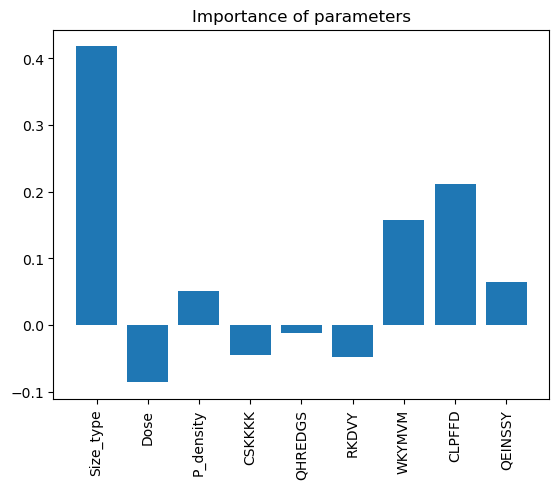

In [11]:
from sklearn.metrics import classification_report
# Instantiate the logistic regression model
log_reg = LogisticRegression()

# Train the model using the training data
log_reg.fit(X_train, np.ravel(y_train))
print(y_train.shape)
# Make predictions on the testing data
y_pred =log_reg.predict(X_test)
y_pred_tarin =log_reg.predict(X_train)
# Evaluate the performance of the model
#print(classification_report(y_test, y_pred))
print(y_pred)
print(y_test)
print(y_pred_tarin)


In [ ]:
importance=np.asarray(log_reg.coef_[0])
print(type(importance))
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.xticks(ticks=range(len(importance)),labels=list(X_train.columns),rotation=90)
plt.title("Importance of parameters")
plt.show()


In [12]:
! pip install lazypredict

In [ ]:
# Import libraries
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef

In [ ]:
# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)

In [ ]:
# Prints the model performance of the train set
models_train

In [ ]:
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)
models_test

### I used randome forest model and use GINI score as importance

In [13]:
# Build random forest model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)

rf.fit(X_train, y_train)

C:\Users\Octavius Jessica\AppData\Local\Temp\ipykernel_21808\1385589263.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(scaledTrain_df, y_train)


RandomForestClassifier(n_estimators=500)

In [14]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [15]:
rf.score(X_test,y_test)

0.8076923076923077

#### different ways of calculating  Accuracy

In [16]:

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.8076923076923077

In [17]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_test_pred)   #because the dataset is very imbalanced    balance accuracy is better to used as metrics


0.68796992481203

In [18]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_test_pred)

array([[ 3,  4],
       [ 1, 18]], dtype=int64)

In [19]:
# Classification report
from sklearn.metrics import classification_report

model_report = classification_report(y_train, y_train_pred, target_names=['positive','negative'])

f = open('model_report.txt','w')
f.writelines(model_report) 
f.close()

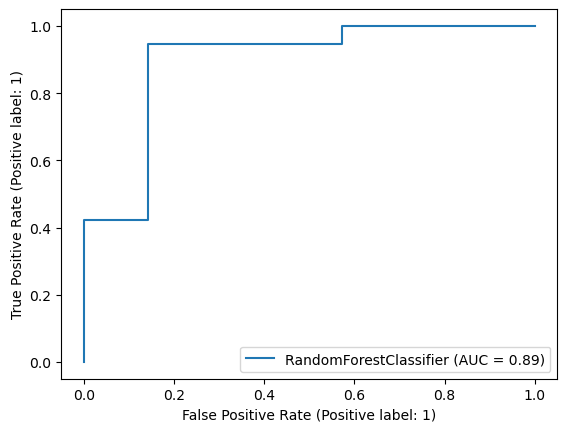

In [20]:
# ROC curve
# ROC curve    for sklearn from version 1.2 or newer
from sklearn.metrics import RocCurveDisplay
rf_disp_test = RocCurveDisplay.from_estimator(rf, X_test, y_test)

### Feature importance

In [21]:
# feature importance values
importance = pd.Series(rf.feature_importances_, name = 'Gini')

# feature names
feature_names = pd.Series(X_train.columns, name = 'Feature')

In [22]:
# Combine feature names and importance values into a Dataframe
df = pd.concat([feature_names, importance], axis=1, names=['Feature', 'Gini'])
df

,Feature,Gini
0,Size_type,0.180339
1,Dose,0.079734
2,P_density,0.356398
3,CSKKKK,0.075949
4,QHREDGS,0.072500
5,RKDVY,0.088468
6,WKYMVM,0.039112
7,CLPFFD,0.058186
8,QEINSSY,0.049314


Text(0.5, 0, 'Feature Importance')

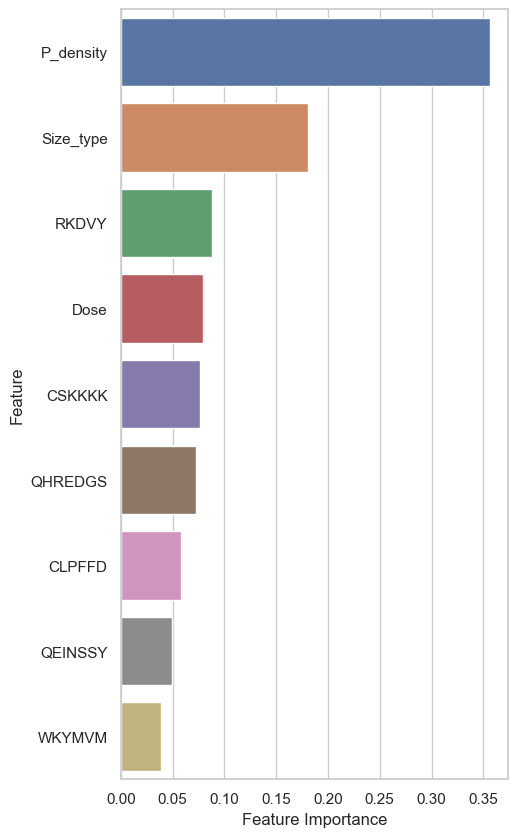

In [23]:
# feature importance plot
import matplotlib.pyplot as plt
import seaborn as sns

df_sorted = df.sort_values('Gini', ascending=False)[:] # Sort by Gini in descending order

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x = 'Gini', y = 'Feature', data = df_sorted)
plt.xlabel("Feature Importance")